# Homework 7: Machine Learning 

Welcome to the seventh and final homework! 

In this homework you practice using pattern classifiers to make predictions.

Please complete this notebook by filling in the cells provided. 


**Deadline:**

This assignment is due **Friday August 1 at 5 PM in Gradescope.** 

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

You should start early so that you have time to get help if you're stuck. 

## Getting started

In order to complete the homework, it is necessary to download a few files. Please run the code below **only once** to download data needed to complete the homework. To run the code, click in the cell below and press the play button (or press shift-enter). 

In [1]:
# if you are running this notebook in colabs, please uncomment and run the following two lines
# !pip install https://github.com/emeyers/YData_package/tarball/master

In [2]:
# Please run this code once to download the files you will need to complete the homework 

import YData 

YData.download_data("college_scorecard_subset_2021_2022.csv")


## 0. Quote and reaction

For the final quote and reaction please read this New York Times article on ["How Companies Learn your Secrets"](https://yale.instructure.com/files/9296957/download?download_frd=1). This was an early article which described how companies were using machine learning to better target their customers. Perhaps now that social media is so pervasive everyone is aware of how companies track us, but at the time of this publication this was relatively new. I will be interested in hearing your thoughts on this article! 

Note: Because the article is a bit long, I have grayed out certain regions of the article which you can skip (i.e., you can only read the parts that have a white background). However, if you are interested in the cognitive neuroscience of habit formation, you might find the other sections interesting as well. 

**Question 0.1 (5 points)**  Please write down your "quote and reaction" here.

*Quote:*  If we wanted to figure out if a customer is pregnant, even if she didn’t want us to know, can you do that?

Reaction: This is a vary interesting way to lead in the following passage 

In [4]:
# This cell imports functions from packages we will use below.
# Please run it each time you load the Jupyter notebook

import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Using a KNN classifier to predict whether a college is a liberal arts college or an R1 university 

Consider the data set: [College Scorecard data](https://collegescorecard.ed.gov/data/)  

Let's now see if we can actually predict what a college's Carnegie classification is, based on other features of the college using classifiers in the scikit-learn package.

We will focus just on R1 research universities (`CCBASIC` value of 15) and liberal arts colleges (`CCBASIC` value of 21) which contain institutions which are some of the most selective colleges in the United States. We will also use just a subset of features which are described below. A DataFrame called `scorecard` that has just the relevant data is created for you in the cell below. 


#### Features

- `CCBASIC`: Carnegie Classification. You will try to predict whether a college is a "Doctoral Universities: Very High Research Activity" (value of 15) or a "Baccalaureate Colleges: Arts & Sciences Focus" (value of 21).  

- `ADM_RATE`: Admission rate

- `SAT_AVG`: Average SAT equivalent score of students admitted

- `TUITIONFEE_OUT`: Out-of-state tuition and fees cost

- `TUITFTE`: Net tuition revenue per full-time equivalent student

- `INEXPFTE`: Instructional expenditures per full-time equivalent student

- `AVGFACSAL`: Average faculty salary

- `PFTFAC`: Proportion of faculty that is full-time

- `C100_4`: Completion rate for first-time, full-time students at four-year institutions (100% of the expected time to completion). 100 percent of normal time is typically 4 years.

- `GRAD_DEBT_MDN`: The median debt for students who have completed

- `PCIP27`: Percentage of degrees awarded in Mathematics And Statistics

- `UGDS_WOMEN`: Total share of enrollment of undergraduate degree-seeking students who are women

- `ROOMBOARD_ON`: Cost of attendance: on-campus room and board cost

- `MD_EARN_WNE_MALE0_P10`: Median earnings of non-male students working and not enrolled 10 years after entry


In [7]:

scorecard = pd.read_csv("college_scorecard_subset_2021_2022.csv")

scorecard = scorecard.query("(CCBASIC ==  15) or (CCBASIC == 21)")

scorecard = scorecard[['CCBASIC', 'ADM_RATE', 'SAT_AVG', 'TUITIONFEE_OUT', 'TUITFTE',
                         'INEXPFTE', 'AVGFACSAL', 'PFTFAC', 'C100_4', 'PCIP27', 'UGDS_WOMEN',
                         'ROOMBOARD_ON', 'MD_EARN_WNE_MALE0_P10']].dropna()

# predict liberal arts college (21) vs. R1 institution (15)
scorecard.head()



CCBASIC  ADM_RATE  SAT_AVG  TUITIONFEE_OUT  TUITFTE  INEXPFTE  AVGFACSAL  \
1      15.0    0.8060   1245.0         20400.0  11986.0   14691.0    11380.0   
4      15.0    0.8039   1262.0         31090.0  14705.0    9650.0    10349.0   
7      15.0    0.8507   1302.0         31956.0  16865.0    8361.0    10722.0   
8      21.0    0.6045   1202.0         18900.0   8672.0   11481.0     6961.0   
14     21.0    0.5648   1068.0         18640.0   8304.0   14892.0     5432.0   

    PFTFAC  C100_4  PCIP27  UGDS_WOMEN  ROOMBOARD_ON  MD_EARN_WNE_MALE0_P10  
1   0.7619  0.3816  0.0138      0.6184       12307.0                42007.0  
4   0.7707  0.5230  0.0079      0.5583       13810.0                47228.0  
7   0.8654  0.5111  0.0095      0.4865       13778.0                48127.0  
8   0.7770  0.6496  0.0622      0.5368       12900.0                43793.0  
14  0.4000  0.4051  0.0000      0.9726       11380.0                29044.0

**Question 1.1 (4 points)**:  Before we dive into using machine learning to make predictions, let's do another data visualization of the data to try to get a sense of which features might be useful for separating these types of colleges. 

Below find "pair plot" of scatter plots between all pairs of columns in the data set using the seaborn function `sns.pairplot()`. (the first argument to this function is a DataFrame that we would like to plot. Also set the `hue` argument to the `CCBASIC` variable so that the points are colored based on the type of college.)

**In the answer section below, describe a couple of features that seem like they might be useful for distinguishing between liberal arts and R1 colleges.** 

Hint: you might have to squint a bit to see the axis labels to axis labels. If they are too hard to see you could split the data into two DataFrames (if you do this you will lose the ability to see the relationship between all pairs of features but you should still be able to get a sense of which features are useful for discriminating between these types of schools). 

Note, this code takes a while to run since it is plotting a lot of data. 


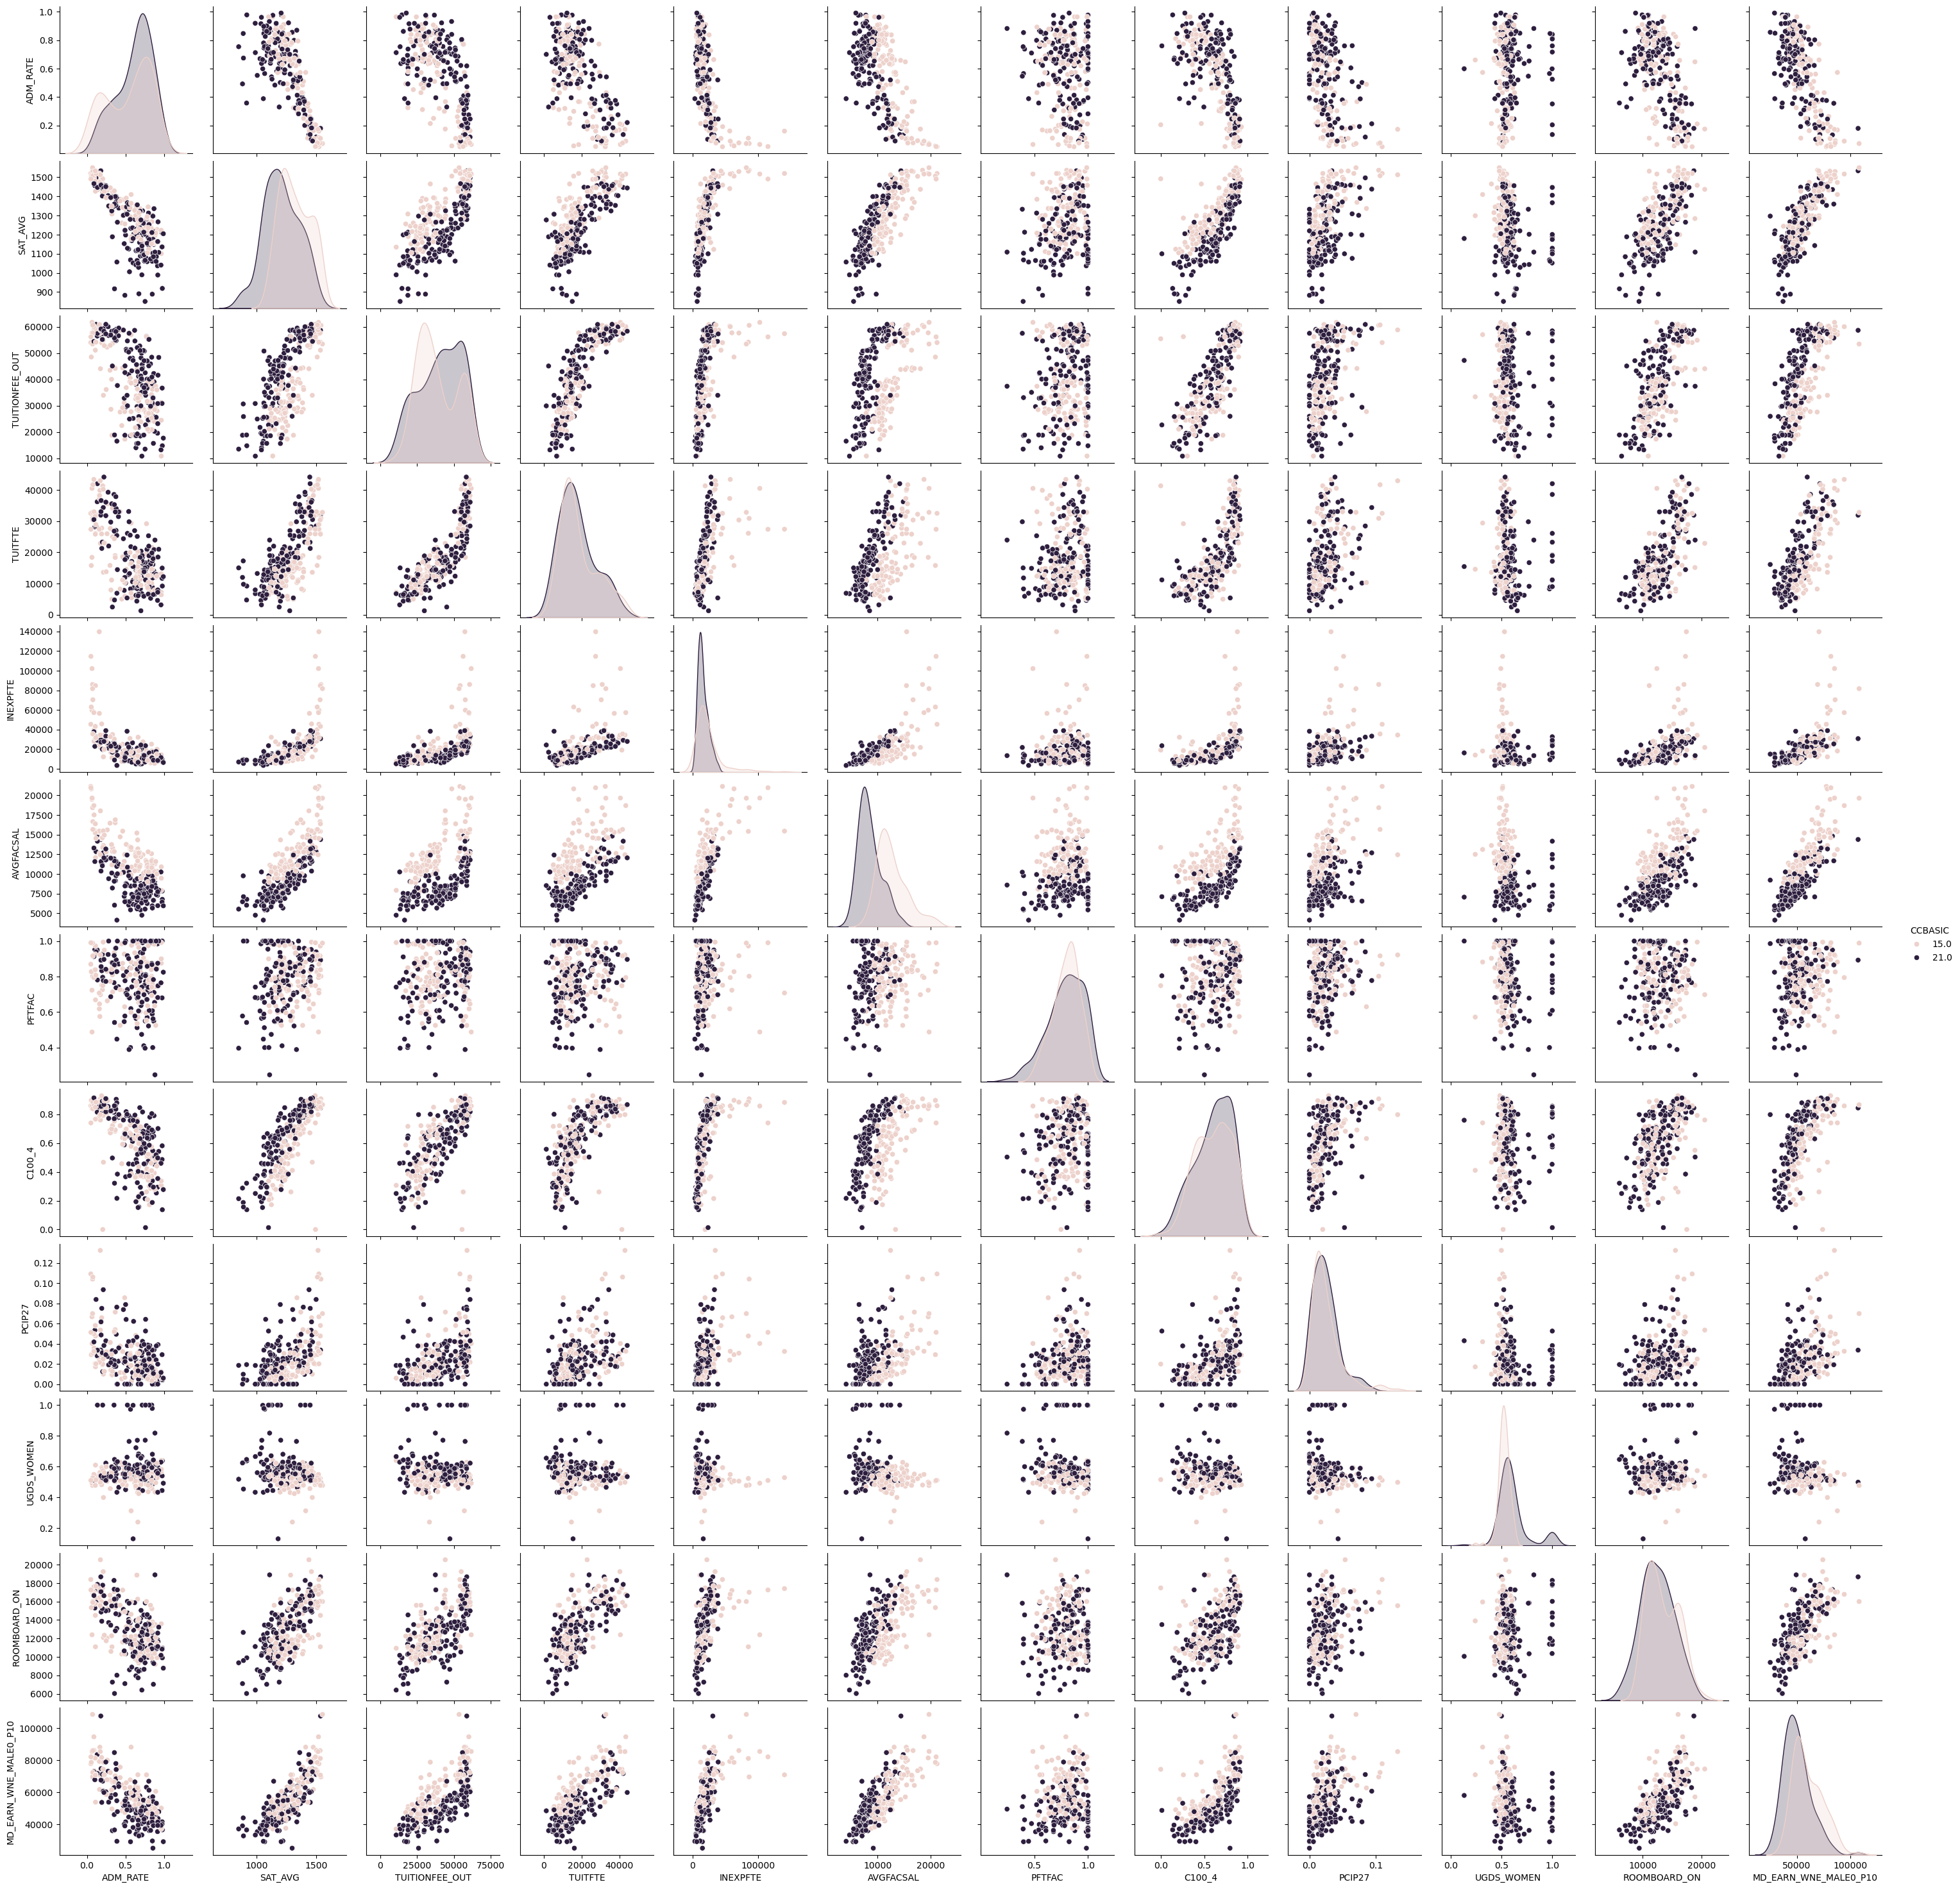

In [9]:
sns.pairplot(data = scorecard, hue ='CCBASIC');



<font color='red'> **Answer**:

ADM_RATE & AVGFACSAL

SAT_AVG & TUITIONFEE_OUT; AVGFACSAL; C100_4

TUITIONFEE_OUT & AVGFACSAL

TUITFTE & AVGFACSAL

INEXPFTE & AVGFACSAL

AVGFACSAL & PFAFAC; C100_4; PCIP27; UGDS_WOMEN; ROOMBOARD_ON; MD_EARN_WNE_MALED_P10

PFTPAC & UGDS_WOMEN

ROOMBOARD_ON & MD_EARN_WNE_MALED_P10

**Question 1.2 (4 points)**: In order to use scikit-learn's machine learning algorithms we need to split apart our data into the "labels" that we are trying to predict and the "features" that we will use to make our predictions. To do this, start with the `scorecard` DataFrame and split it into a Series called `labels_y` that has our classification labels, and into a DataFrame called `features_X` that has our features. 

Once you have done this, print the first 3 rows of the `features_X` DataFrame to show your code worked correctly. 

Hint: The pandas `df.drop()` method could be useful. 

In [19]:
features_X = scorecard.drop(columns = "CCBASIC")
print(features_X.head(3))
labels_y = scorecard["CCBASIC"]

   ADM_RATE  SAT_AVG  TUITIONFEE_OUT  TUITFTE  INEXPFTE  AVGFACSAL  PFTFAC  \
1    0.8060   1245.0         20400.0  11986.0   14691.0    11380.0  0.7619   
4    0.8039   1262.0         31090.0  14705.0    9650.0    10349.0  0.7707   
7    0.8507   1302.0         31956.0  16865.0    8361.0    10722.0  0.8654   

   C100_4  PCIP27  UGDS_WOMEN  ROOMBOARD_ON  MD_EARN_WNE_MALE0_P10  
1  0.3816  0.0138      0.6184       12307.0                42007.0  
4  0.5230  0.0079      0.5583       13810.0                47228.0  
7  0.5111  0.0095      0.4865       13778.0                48127.0  


**Question 1.3 (4 points)**: Let's now count how many examples there are in each of our two classes (i.e., how many examples there are of liberal arts colleges, and how many examples there are of R1 universities). To do this, call the `.value_counts()` method on the `labels_y` Series, and save the results to the name `class_counts` and print the results. 

After you have done this, in the answer section below, please answer the following questions: 

1. Suppose you had to guess which class a randomly selected data points belonged to, but were not given any of the features values. What would be the best strategy to use to guess which class the point belonged to in order to get the most correct guesses?

2. If you used the best strategy to guess the class of those points (with no knowledge of the features), what percentage of the points would you guess correctly?  Note: this is the "baseline" accuracy we should expect a randomly guessing classifier to get correct, and we should expect a real classifier to do better than this baseline accuracy. 

Hint: To answer the second question, it will be useful to write one additional line of code in the cell below.


In [25]:
class_counts = labels_y.value_counts()
class_counts

CCBASIC
21.0    139
15.0    123
Name: count, dtype: int64

In [27]:
139/(123+139)

0.5305343511450382

<font color='red'> **Answer**:

1. Liberal arts colleges. Since it is appeares more frequent in the sample.


2. 53.05%




**Question 1.4 (4 points)**: As we discussed in class, it's important to split data into two non-overlapping parts called the "training set" and the "test set". We use the data in the training set to "train the classifier" where the classifier "learns" the relationship between the features and the labels. We can then use the separate test set, in order to assess how accurately the classifier can make predictions on new data. 

To split the data into training and tests, we can use the scikit-learning function  `X_train, X_test, y_train, y_test = train_test_split(X,  y, random_state = 0)`, where the arguments to the function are:
- `X`: A DataFrame (or matrix) of data features
- `y`: A Series (or ndarray) of labels
- `random_state`: A number that determines which "random points" are in the training and test set (this makes our results reproducible by generating the same random splits). 

The output to this function are:
- `X_train`: A DataFrame with the training features
- `X_test`:  A DataFrame with the test features
- `y_train`: A Series with the training labels
- `y_test`:  A Series with the test labels

Please go ahead and run the `train_test_split()` function to split the data into a training and test set (using `random_state = 0` argument). Once you have done this, print out the number of points that are in the training set and the number of points that are in the test set. 


In [32]:
from sklearn.model_selection import train_test_split


# create the training and test splits of the data
X_train, X_test, y_train, y_test = train_test_split(features_X,labels_y,random_state = 0)




# print out how many points are in the training and test sets
num_train_points = len(X_train)
num_test_points = len(X_test)

print(f"The number of points in the training set is: {num_train_points}" )
print(f"The number of points in the test set is: {num_test_points}")


The number of points in the training set is: 196
The number of points in the test set is: 66


**Question 1.5 (4 points)**: Now that we have training and test data sets, we are ready to train a classifier. Here let's use the k-nearest neighbors classifier (KNN) that we discussed in class. 

To create a KNN classifier, we can use the `KNeighborsClassifier(n_neighbors = )` constructor. Please call this constructor to create a KNN classifier using one neighbor and save the result to the name `knn`. 

Once you have created this classifier, please train the classifier using the `.fit(X, y)` method where `X` and `y` are the training features and training labels. 

Note: training the KNN classifier (i.e., calling the `.fit()` method) just involves having the classifier save the training and test data for future use. This data is saved by (what is now a "trained") the classifier so that we can now use it to make predictions on new data. 


In [34]:
from sklearn.neighbors import KNeighborsClassifier

# construct a classifier
knn = KNeighborsClassifier(n_neighbors = 1)


# “train” the classifier
knn.fit(X_train,y_train)



KNeighborsClassifier(n_neighbors=1)

**Question 1.6 (4 points)**: Now that our KNN classifier has been trained (i.e., now that the KNN classifier has saved the training data), we can use it to make predictions!  

To get predictions, we can use the `.predict()` method, which takes a set of features and returns an ndarray of predicted labels.  Please make predictions on the test data and save the predicted labels to the name `predicted_labels`. Print out the predicted labels to see what the predictions are. 



In [42]:
y_test.shape

(66,)

In [46]:
predicted_labels = knn.predict(X_test)
predicted_labels

array([21., 21., 21., 21., 15., 15., 15., 21., 21., 21., 15., 21., 21.,
       21., 15., 15., 21., 15., 15., 15., 15., 15., 15., 15., 21., 21.,
       15., 21., 21., 21., 21., 21., 21., 15., 21., 21., 21., 21., 21.,
       21., 15., 21., 15., 21., 15., 15., 21., 21., 21., 15., 15., 15.,
       15., 15., 21., 21., 15., 21., 21., 21., 21., 21., 15., 15., 21.,
       15.])

**Question 1.7 (4 points)**: Let's now see how accurate the predictions are. To do this, compare them to the actual test labels, and print out the "prediction accuracy" which is the proportion of data points that the classifier predicted correctly. In the answer section, report if this value is higher than what we might expect if the classifier was randomly guessing. 

In [48]:
np.mean(predicted_labels == y_test)


0.8636363636363636

<font color='red'> **Answer**: The value is higher than randomly guessing.

**Question 1.8 (4 points)**: In question 1.6 we had a trained KNN classifier make predictions, and in step 1.7 we used these predictions to assess the classifier's accuracy. Since these two steps are used so frequently in combination, the scikit-learn package has a single method called `.score()` that does both these steps together. In particular, if you call the `.score()` method on a trained KNN classifier giving it test data features and test labels as the arguments, it will return the classification accuracy. 

Please use this `.score()` method on our trained 1-nearest neighbor classifier (i.e., the `knn` classifier you trained in question 1.5) to get the classification accuracy, and print out the value below. The value should match the accuracy you reported in question 1.7. 


In [53]:
knn.score(X_test,y_test)

0.8636363636363636

**Question 1.9 (4 points)**: Let's now explore what happens if we tested our KNN classifier on the same data that we trained it on. To do this, use the `.score()` method on our 1-nearest neighbor classifier, but, instead of passing the test features and test labels into the `.score()` method as arguments, pass the training features and training labels. 

In the answer section, please write answers to the following questions: 

1. In 1-5 sentences, explain why the classification accuracy is perfect. 

2. If we had trained and tested the classifier on the same data, but used a value of k = 3 neighbors, would the classification accuracy still be perfect?  Also, in this scenario, would the classification accuracy be a good proxy for how well the classifier would do on new test data? 


In [55]:
knn.score(X_train,y_train)


1.0

<font color='red'> **Answer**:

1. The calssification accuracy is perfect because we used training data as test set and the model already learnt whole information from the training data. Or intuitively, since it is 1-nearest neighbor, the nearest neighbor of a point in the training set is itself, whose label is already known by the model.



2. Due to the analysis above, I think the answer would be no. However, in this senario it is still a not a good proxy for the performance of the model on new test data.





**Question 1.10 (4 points)**:  So far we have just used a single training and test split of the data to train and test the KNN classifier. However, as discussed in class, in order to get more robust results we can use k-fold cross-validation where we split the data set into k parts. Once we have split the data into k parts, we then train the classifier on k-1 of these parts and test it on the remaining part. We then repeat this process k times, leaving out a different test set each time and training on the remaining data.

To run a cross-validation analysis, we can use the scikit-learn `cross_val_score(classifier, features, labels, cv = num_cv_splits)` function. This function takes the following arguments: 

1. An untrained classifier
2. A set of features for each data point
3. The class labels for each data point
4. The `cv` argument should be set to the number of cross-validation splits (k) that we would like to use. 

Please create a new 1-nearest neighbor classifier and save it to the name `knn` (overwriting your previous classifier). Then use the `cross_val_score()` to run 5-fold cross-validation by passing it this new KNN classifier, all your features, all your labels, and setting the `cv = ` argument appropriately. Note, since this function is doing the training and test splits for us, we should pass the full original `features_X`,  `labels_y` data, rather than the `X_train`, `X_test`, `y_train`, `y_test` splits we created ourselves. 

Save the results from running the `cross_val_score()` to the name `scores` and print out the values in the `scores` ndarray which are the classification accuracies for each cross-validation split (i.e., 5 numbers for each time the classifier was trained and tested). Also, print out the mean classification accuracy over the 5 cross-validation splits to show the overall classification accuracy. 


Note: the `k` in k-fold cross-validation has no relationship to the `k` in our KNN classifier. It is just that the letter `k` is used frequently to indicate a particular integer value (so unfortunately using the symbol `k` as notation is overloaded here). 



In [71]:
from sklearn.model_selection import cross_val_score

# construct knn classifier
knn = KNeighborsClassifier(n_neighbors = 1)

# do 5-fold cross-validation
scores = cross_val_score(knn,features_X,labels_y,cv = 5)
print(scores)
print(np.mean(scores))

[0.86792453 0.79245283 0.76923077 0.80769231 0.88461538]
0.8243831640058055


**Question 1.11 (4 points)**: In all our analyses so far we have also only used a 1-nearest neighbor classifier. Let's now assess how the classification accuracy changes if we change the number of neighbors that are used to classify each test data point (i.e., if we change the value of `k` in our k-nearest neighbors classifier). 

To do this, please use a for loop to iterate through different numbers of neighbors in your KNN classifier. Specifically, please do the following:

1. Create an empty list called `neighborhood_size_scores` that will store the results from using the KNN classifier with 1 to 9 neighbors (i.e. k values from 1 to 9).
2. Use a for loop that loops over the values of `k` from 1 to 9 where in each iteration of the loop you: 

a. Build a new KNN classifier that uses `k` neighbors.      
b. Use the `cross_val_score()` function to run 5-fold cross-validation on the current KNN classifier (i.e., for the current value of `k` neighbors). This can be done using very similar code to question 1.10.    
c. Append the average cross-validation accuracy from the current KNN classifier to the `neighborhood_size_scores` list.

Once you have done this, print out the `neighborhood_size_scores` list to show the classification accuracies obtained from different values of `k` neighbors.


In [188]:
neighborhood_size_scores = []
for i in range(9):
    j = i + 1
    knn = KNeighborsClassifier(n_neighbors = j)
    neighborhood_size_scores.append(cross_val_score(knn,features_X,labels_y,cv=5))

neighborhood_size_scores

[array([0.86792453, 0.79245283, 0.76923077, 0.80769231, 0.88461538]),
 array([0.8490566 , 0.8490566 , 0.75      , 0.76923077, 0.84615385]),
 array([0.83018868, 0.79245283, 0.73076923, 0.76923077, 0.84615385]),
 array([0.8490566 , 0.77358491, 0.75      , 0.75      , 0.86538462]),
 array([0.86792453, 0.81132075, 0.80769231, 0.75      , 0.86538462]),
 array([0.88679245, 0.83018868, 0.76923077, 0.80769231, 0.90384615]),
 array([0.88679245, 0.81132075, 0.76923077, 0.80769231, 0.88461538]),
 array([0.88679245, 0.8490566 , 0.73076923, 0.78846154, 0.88461538]),
 array([0.88679245, 0.81132075, 0.75      , 0.78846154, 0.86538462])]

**Question 1.12 (4 points)**: Let's now visualize how the results changed with different values of k neighbors (i.e., visualize the results you got on the previous problem). To do this, plot the results using matplotlib. Please be sure that the values on your axes are appropriate and that you label your axes (as always!). 

Then, in the answer section, report what the best number of neighbors to use appears to be (i.e., what is the best `k` in KNN to use for this data). 


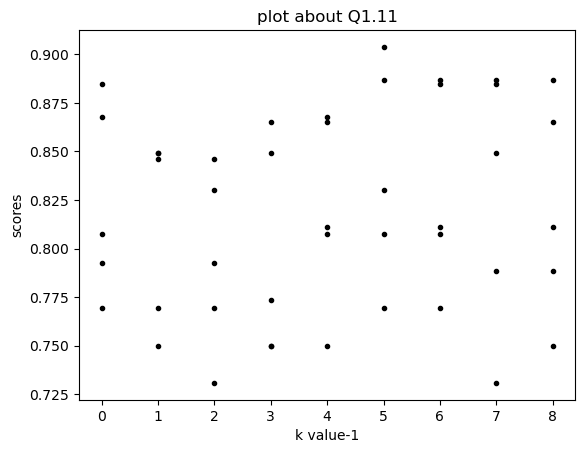

In [167]:
plt.plot(neighborhood_size_scores,'.',color="black");
plt.xlabel("k value-1");
plt.ylabel("scores");
plt.title("plot about Q1.11");

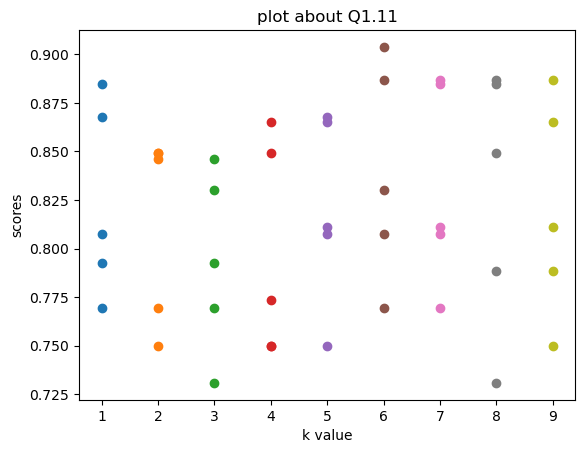

In [172]:
for i in range(9):
    j = i + 1
    plt.scatter([j,j,j,j,j],neighborhood_size_scores[i]);

plt.xlabel("k value");
plt.ylabel("scores");
plt.title("plot about Q1.11");

<font color='red'> **Answer**: I think 6 would be the best




## 2. Experimenting with additional classifiers

As a final set of exercises, let's briefly explore a couple of additional classifiers. In order to understand how these classifiers work, you will need to take a machine learning class. However, even without understanding how they work, we can still use them to see if they give better classification performance compared to a KNN classifier. 



**Question 2.1 (4 points)**: Let's start by comparing our KNN results to results from a Support Vector Machine (SVM). To do this, use the following steps:

1. Create a support vector machine called `svm` using the `LinearSVC()` constructor  
2. Use the `cross_val_score()` function to run a 5-fold cross-validation and save the scores to the name `svm_scores` (hint: this is very similar to what you did in part 1.10). 

Print out the mean cross-validation SVM scores to show you have the right answer. In the answer section below, report whether the SVM gave better classification results compared to the KNN classifier you got in question 1.11.   

Note: There is some code below that suppresses a few warning messages. Please ignore this code (and ignore any warnings that you might get about "Liblinear failed to converge").

In [194]:
# Suppress ConvergenceWarning - please ignore this code 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


from sklearn.svm import LinearSVC

# create the SVM
svm_model = LinearSVC()

# do 5-fold cross-validation
svm_scores = cross_val_score(svm_model,features_X,labels_y,cv=5)

# print the mean scores 
print(np.mean(svm_scores))
print(np.mean(neighborhood_size_scores))

0.869956458635704
0.8187469762941462


<font color='red'> **Answer**: Yes, SVM gave better classification results compared to KNN.




**Question 2.2 (4 points)**: Finally, let's try a random forest classifier (for an idea of how this classifier works, [see this diagram](https://i.pinimg.com/originals/02/21/18/02211856c8ed1c5d01cce6855545a9f8.jpg)). To do this, please use the following steps which are very similar to what we used for our Support Vector Machine:

1. Create a random forest classifier called `random_forest` using the `RandomForestClassifier()` constructor 

2. Use the `cross_val_score()` function to run a 5-fold cross-validation and save the scores to the name `forest_scores` (hint: this is very similar to what you did in part 1.10). 

Print out the mean cross-validation Random Forest scores to show you have the right answer. In the answer section below, report whether the Random Forest gave better classification results compared to the SVM and KNN classifier you got in questions 2.1 and 1.11.


In [196]:
from sklearn.ensemble import RandomForestClassifier

# create the random forest classifier
random_forest = RandomForestClassifier()

# do 5-fold cross-validation
forest_scores = cross_val_score(random_forest,features_X,labels_y,cv=5)


# print the mean scores 
print(np.mean(forest_scores))




0.9157474600870827


<font color='red'> **Answer**: Random forest give better classification results compared to the SVM and KNN classifier.



## 3. Profit!

Now that you know how to use classifiers, you can use them to compete in classification competitions on websites such as https://www.kaggle.com/.  This site has a range of competitions some of which pay out prize money (currently it looks like the prizes range up to $1,000,000).



## 4. Reflection (3 points)

Please reflect on how the homework went by going to Canvas, going to the Quizzes link, and clicking on reflection on homework 7. 



## 5. Submission

Please submit your assignment as a .pdf on Gradescope. You can access Gradescope through Canvas on the left-hand side of the class home page. The problems in each homework assignment are numbered. **NOTE:** When submitting on Gradescope, please select the correct pages of your pdf that correspond to each problem. **Failure to mark pages correctly will result in points being deducted from your homework score.**

If you are running Jupyter Notebooks through an Anaconda installation on your own computer, you can produce the .pdf by completing the following steps:  
1.  Go to "File" at the top-left of your Jupyter Notebook
2.  Under "Download as", select "HTML (.html)"
3.  After the .html has downloaded, open it and then select "File" and "Print" (note you will not actually be printing)
4.  From the print window, select the option to save as a .pdf

If you are running the assignment on Google Colab, you can use the following instructions: 
1.  Go to "File" at the top-left of your Jupyter Notebook and select "File" and "Print" (note you will not actually be printing)
2. From the print window, select the option to save as a .pdf
3. Be sure to look over the pdf file to make sure all your code and written work is saved in a clear way.

<br>
<br>
<br>
<br>

## Bonus Section 


This section is worth 0 points toward your grade. 

**But if you are interested in building more accuracy machine learning models then you might find the material valuable (particularly if you are interested in competing in a kaggle competition).**

## Bonus section: Transforming features

If you look at the features we have been using in our analyses so far, you will notice that they are on very different scales. This is quite problematic for a KNN classifier since the classifier is finding the distance between each data point, so features that have large values will dominate this distance. 

Let's explore the scales that different features have by looking at some descriptive statistics. In particular, let's go back to the manually created `X_train`, `X_test`, `y_train`, `y_test` to examine the scale that different features are measured on.


**Question b.1 (0 points)**:  To start this set of analyses, call the `.describe()` method on training data you create in question 1.4 to see summary statistics on the training data and print out the results. Based on these summary statistics, in the answer section please report which features will essentially be ignored by our KNN classifier since they have value ranges that are very small relative to other features in our data set. 


<font color='red'> **Answer**:



**Question b.2 (0 points)**: In order to have all features contribute to the KNN classification, it is useful to standardize the features by transforming them to the same scale. In particular, we can use a "z-score" transformation, where each feature is transformed to have a mean of 0 and a standard deviation of 1. The way this is done is that the mean and standard deviation are learned on the training features, and then these means and standard deviations are used to apply a z-score transformation to both the training and test features. 

To do a z-score transformation of our features, we can use the `StandardScaler()` object. In particular, please do the following: 

1. Create a new `StandardScaler()` object using `scalar = StandardScaler()` 
2. Have the `scalar` object learn the means and standard deviations of our training data by calling the `scalar.fit(X)` function on the training data you created in question 1.4. 

Once we have fit our `scalar` object, we can apply it to transform both the training and test features so that all features are on a similar scale. To do this, call the `.transform(X)` method on the training data created in part 1.4 and save the results to the name `X_train_transformed`. Also, apply the `.transform(X)` method on the test data created in part 1.4 and save the results to the name `X_test_transformed`. 

Finally, print the type of the `X_train_transformed` data.


In [13]:
from sklearn.preprocessing import StandardScaler







**Question b.3 (0 points)**: In order to see that the z-score transformation worked, please convert the `X_train_transformed` data to a pandas DataFrame using the `pd.DataFrame()` method, and save the results to the name `X_train_transformed_df`. Make sure that the column names of the  `X_train_transformed_df` match the original column names by using the `columns` argument to the `pd.DataFrame()` function. 

Once you have created the `X_train_transformed_df` use the `.describe()` method to print the descriptive statistics on the data. In the answer section, report whether the means and standard deviations of the transformed features are what you expect. 

<font color='red'> **Answer**:



**Question b.4 (0 points)**: Now let's see if z-score transforming the data helped improve our classification performance using a 1-nearest neighbor classifier. To do this, please do the following steps: 

1. Create a new 1-nearest neighbor classifier named `knn`.
2. Fit this classifier on the transformed training data and the training labels
3. Assess the classification accuracy on the test data using the `.score()` method.

In the answer section, report whether transforming the features seemed to help by comparing the results you get to the classification results you got without transforming the features (i.e., the results you got on question 1.7 and 1.8). 


<font color='red'> **Answer**:




**Question b.5 (0 points)**: In order to transform our features inside a cross-validation loop, we can set up a pipeline. This pipeline will do the following:

1. It will split the data into a training and test set
2. It will fit the transformation of the features on the training set (i.e., learn the means and standard deviations on the training set). 
3. It will apply a z-score transformation of the training and test set based on the features learned in step 2
4. It will train the classifier on the transformed data
5. It will measure the classification accuracy on the test data
6. It will repeat this process k times, where k here refers to how many cross-validation splits we are using

In order to do this in scikit-learn we can use a `Pipeline` object which sets up the stages of transformation and classification, along with a `KFold` object which will run the cross-validation. 

The code below does this all for you, and returns an ndarray which has the classification accuracy from each cross-validation split in the name `scores`. Please just print out the mean of these scores to show the average score you get over cross-validation splits. 

In the answer section, now report whether transforming the features seemed to help the average cross-validated results by comparing the results you got here to the average cross-validation results you got when you did not transform the features (i.e., the average results you got on question 1.10). 


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold

scalar = StandardScaler()
knn = KNeighborsClassifier(n_neighbors = 1) 
cv = KFold(n_splits=5)

pipeline = Pipeline([('transformer', scalar), ('estimator', knn)])

scores = cross_val_score(pipeline, features_X, labels_y, cv = cv)


# print out the mean score over the 5 cross-validation splits




<font color='red'> **Answer**:




**Question b.6 (0 points)**: Let's test how the results vary as a function of using different numbers of neighbors in our KNN classifier on the **transformed data**. To do this, start by creating an empty list called  `neighborhood_size_scores2` to store the results. Then create a loop that loops over different KNN classifiers using 1 to 9 neighbors and inside the loop do the following: 


1. Build a new KNN classifier that uses `k` neighbors based on the current iteration of the loop
2. Build a new pipeline with our scalar transformer and classifier. This can be done using code that is very similar to question 2.5
4. Calculate the cross-validation scores using the `cross_val_score()` function. Again, this can use code that is very similar to question 2.5
4. Append the average cross-validation accuracy from the current KNN classifier to the `neighborhood_size_scores2` list.

To show your code worked, please print out the results scored in `neighborhood_size_scores2`


In [16]:
neighborhood_size_scores2 = []











**Question b.7 (0 points)**: Finally, let's visualize all our results from the different numbers of neighbors on the untransformed and transformed data as line plots using matplotlib. Be sure to label your axes and have a legend indicating which results are from the normalized and unnormalized features. In the answer section, report whether overall normalizing the data helped. 

<font color='red'> **Answer**:




## Another Bonus Section: Experimenting with additional classifiers

Finally, let's briefly explore a couple of additional classifiers using a pipeline as we did above, but this time let's apply feature normalization in our pipeline. 


**Question bb.1 (0 points)**: Start by comparing our KNN results to results from a Support Vector Machine (SVM). To do this, use the following steps:

1. Create a support vector machine called `svm` using the `LinearSVC()` constructor 
2. Create a pipeline, as in question 2.5, where the a scalar z-score tranformation is used, followed by using the SVM we created 
3. Use the `cross_val_score()` function to get the cross-validation scores and save the scores to the name `svm_scores`

Print out the mean cross-validation SVM scores to show you have the right answer. In the answer section below, report whether the SVM gave better classification results compared to the KNN classifier you got in question b.5.   

Note: Again, there is some code below that suppresses a few warning messages. Please ignore this code (and ignore any warnings that you might get about "Liblinear failed to converge").

In [17]:
# Suppress ConvergenceWarning - please ignore this code 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


from sklearn.svm import LinearSVC








<font color='red'> **Answer**:




**Question bb.2 (0 points)**: Let's also try a random forest classifier including a z-score normalization step in our pipeline. To do this, please use the following steps (which are very similar to what we did above):

1. Create a random forest classifier called `random_forest` using the `RandomForestClassifier()` constructor 
2. Create a pipeline, as in question b.5, where the scalar z-score transformation is used, followed by using the Random Forest Classifier we created 
3. Use the `cross_val_score()` function to get the cross-validation scores and save the scores to the name `forest_scores`

Print out the mean cross-validation Random Forest scores to show you have the right answer. In the answer section below, report whether the Random Forest gave better classification results compared to the SVM and KNN classifier you got in questions b.5 and bb.1.  


In [18]:
from sklearn.ensemble import RandomForestClassifier









<font color='red'> **Answer**:


